Loading The Data Set

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Adidas.csv')

In [3]:
data

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$6,00,000","$3,00,000",50%,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$5,00,000","$1,50,000",30%,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$4,00,000","$1,40,000",35%,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$3,82,500","$1,33,875",35%,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",30%,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,24-01-2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet
9644,Foot Locker,1185732,24-01-2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet
9645,Foot Locker,1185732,22-02-2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet
9646,Foot Locker,1185732,22-02-2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet


Viewing the first 5 rows to see what the data looks like

In [4]:
print("First 5 Rows")
display(data.head())

First 5 Rows


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$6,00,000","$3,00,000",50%,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$5,00,000","$1,50,000",30%,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$4,00,000","$1,40,000",35%,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$3,82,500","$1,33,875",35%,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",30%,In-store


Checking the shape (number of rows and columns)

In [5]:
print("Data Shape")
print(data.shape)

Data Shape
(9648, 13)


Checking the data types and missing values

In [6]:
print("Data Info")
data.info()

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


CLEANINGING THE DATA

Removing '$' and ',' from Price, Sales, and Profit columns

We use .replace() to swap the symbols with nothing ''

In [7]:
cols_to_clean = ['Price per Unit', 'Total Sales', 'Operating Profit']
for col in cols_to_clean:
    data[col] = data[col].replace({'\\$': '', ',': ''}, regex=True).astype(float)

Removing ',' from Units Sold

In [8]:
data['Units Sold'] = data['Units Sold'].replace({',': ''}, regex=True).astype(float)

Removing '%' from Operating Margin and divide by 100 (to make 50% -> 0.50)

In [9]:
data['Operating Margin'] = data['Operating Margin'].replace({'%': ''}, regex=True).astype(float) / 100

In [10]:
print("\nCleaning complete.")


Cleaning complete.


Checking the info again to confirm they are now 'float' (numbers)

In [11]:
print("\nUpdated Data Info:")
data.info()


Updated Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Product           9648 non-null   object 
 7   Price per Unit    9648 non-null   float64
 8   Units Sold        9648 non-null   float64
 9   Total Sales       9648 non-null   float64
 10  Operating Profit  9648 non-null   float64
 11  Operating Margin  9648 non-null   float64
 12  Sales Method      9648 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 980.0+ KB


Checking for duplicate rows

In [12]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows before dropping: {duplicates}")

Number of duplicate rows before dropping: 0


Checking for missing (null) values in each column

In [13]:
print("\n Missing Values:")
print(data.isnull().sum())


 Missing Values:
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


 DESCRIPTIVE STATISTICS

Getting summary statistics for the numeric columns
This shows count, mean (average), std, min, and max for columns like Total Sales.

In [14]:
 print("\nDescriptive Statistics")


Descriptive Statistics


In [15]:
display(data.describe())

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.282131,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.124141,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1922.000000,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.500000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52063.000000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


Check unique values for some text columns

In [16]:
print("\n Unique Retailers ")


 Unique Retailers 


In [17]:
print(data['Retailer'].unique())

['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']


In [18]:
print("\n Unique Regions ")


 Unique Regions 


In [19]:
print(data['Region'].unique())

['Northeast' 'South' 'West' 'Midwest' 'Southeast']


In [20]:
print("\n Unique Sales Methods ")


 Unique Sales Methods 


In [21]:
print(data['Sales Method'].unique())

['In-store' 'Outlet' 'Online']


# VISUALIZATION

Correlation Heatmap
(We select only numeric columns to see how they relate to each other)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

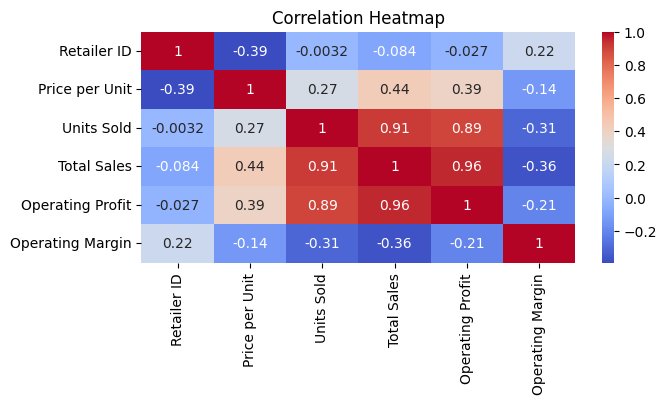

In [23]:
plt.figure(figsize=(7, 3))
sns.heatmap(data.select_dtypes(include=['float', 'int']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Boxplot of Total Sales
(This helps us see the spread of sales data and potential outliers)

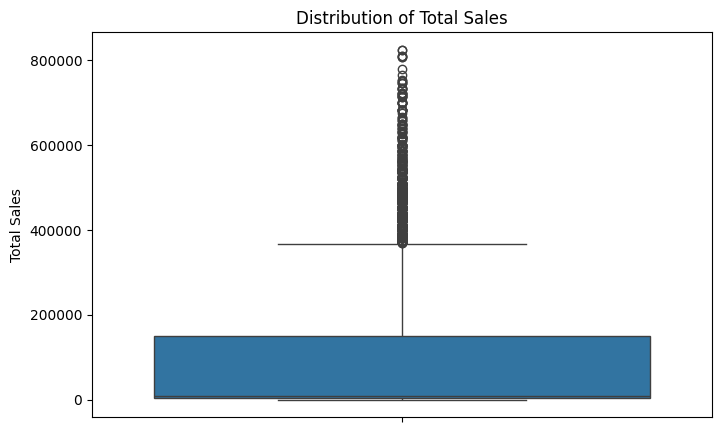

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(y='Total Sales', data=data)
plt.title("Distribution of Total Sales")
plt.show()

Scatterplot: Units Sold vs Total Sales
(Visualizing the relationship between how many units are sold vs the total money made)

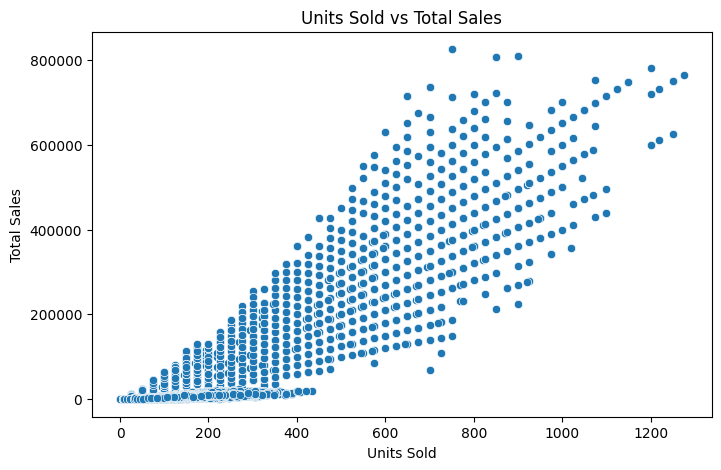

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Units Sold', y='Total Sales', data=data)
plt.title("Units Sold vs Total Sales")
plt.show()

Barplot: Average Sales by Region
(Comparing which region has the highest average sales)

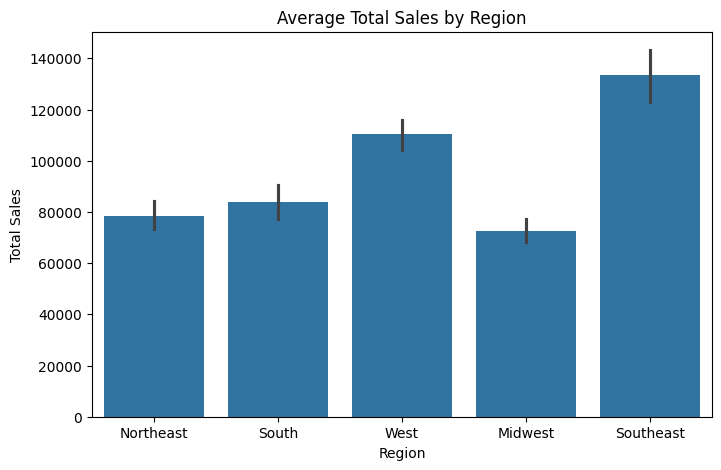

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Total Sales', data=data)
plt.title("Average Total Sales by Region")
plt.show()

# DATA PREPROCESSING

In [27]:
from sklearn.preprocessing import LabelEncoder

we are creating a copy of the data so we don't mess up the original

In [28]:
df_model = data.copy()

Initializing the LabelEncoder

In [29]:
le = LabelEncoder()

List of columns that are text (Object) and need to be numbers

In [30]:
text_columns = ['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']

Looping through each column and turn it into numbers

In [31]:
for col in text_columns:
    df_model[col] = le.fit_transform(df_model[col])

Check the head again

Now, we should see numbers now instead of text for Retailer, Region, etc.

In [32]:
display(df_model.head())

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,1,1185732,01-01-2020,1,31,35,2,50.0,1200.0,600000.0,300000.0,0.50,0
1,1,1185732,02-01-2020,1,31,35,1,50.0,1000.0,500000.0,150000.0,0.30,0
2,1,1185732,03-01-2020,1,31,35,5,40.0,1000.0,400000.0,140000.0,0.35,0
3,1,1185732,04-01-2020,1,31,35,4,45.0,850.0,382500.0,133875.0,0.35,0
4,1,1185732,05-01-2020,1,31,35,0,60.0,900.0,540000.0,162000.0,0.30,0


Finding non-numeric columns

In [35]:
import numpy as np

In [36]:
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns found:", non_numeric)

Non-numeric columns found: ['Invoice Date']


In [37]:
# Converting Invoice Date into datetime
df_model['Invoice Date'] = pd.to_datetime(df_model['Invoice Date'], dayfirst=True)

# Creating numeric features
df_model['Invoice_Year'] = df_model['Invoice Date'].dt.year
df_model['Invoice_Month'] = df_model['Invoice Date'].dt.month
df_model['Invoice_Day'] = df_model['Invoice Date'].dt.day

# Now droping original date column
df_model.drop(columns=['Invoice Date'], inplace=True)

Checking the changes

In [52]:
df_model.dtypes

Retailer              int64
Retailer ID           int64
Region                int64
State                 int64
City                  int64
Product               int64
Price per Unit      float64
Units Sold          float64
Total Sales         float64
Operating Profit    float64
Operating Margin    float64
Sales Method          int64
Invoice_Year          int32
Invoice_Month         int32
Invoice_Day           int32
dtype: object

# Machine Learning

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
X = df_model.drop(columns=['Total Sales'])
y = df_model['Total Sales']

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split the data (80% for training, 20% for testing)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Now to train the Linear Regression Model

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Make Predictions on the Test Set

In [47]:
y_pred = model.predict(X_test)

Evaluate the Model
Mean Squared Error (MSE): The average squared difference between estimated values and the actual value.
R2 Score: How well the model explains the data (1.0 is perfect, 0.0 is bad).

In [48]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [49]:
print("\n Model Results")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score (Accuracy): {r2:.4f}")


 Model Results
Mean Squared Error: 903763624.31
R^2 Score (Accuracy): 0.9557


This means your model is explaining 95% of the variation in Total Sales.
For a business dataset like Adidas sales data, this is VERY strong.